In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
## Skill count per month for data analysts
df_DA_IR = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Ireland')].copy()

df_DA_IR['job_posted_month_no'] = df_DA_IR['job_posted_date'].dt.month

# Explode job_skills column
df_DA_IR_explode = df_DA_IR.explode('job_skills')

In [4]:
# Group by month and job_skills
df_DA_IR_pivot = df_DA_IR_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_IR_pivot

job_skills,airflow,alteryx,aurora,aws,azure,bash,bigquery,bitbucket,c,cognos,...,swift,t-sql,tableau,terminal,unity,unix,vba,visio,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2,14,1,7,14,0,1,0,4,4,...,0,0,41,0,0,0,2,4,0,9
2,0,0,0,1,6,0,1,1,1,0,...,0,0,13,0,0,0,1,0,0,4
3,1,5,0,5,10,0,0,0,2,0,...,0,0,19,0,0,0,0,1,0,5
4,0,5,0,2,8,0,0,0,0,0,...,0,0,22,1,0,0,6,0,1,11
5,0,4,0,0,5,2,0,0,0,1,...,0,0,21,0,0,0,6,2,0,6
6,0,1,0,0,2,0,0,0,0,0,...,0,2,29,0,0,3,5,0,0,6
7,1,1,0,3,7,2,0,0,0,2,...,2,0,27,0,0,1,2,0,0,1
8,1,1,0,1,3,0,1,0,1,0,...,1,2,17,0,0,3,4,0,0,2
9,0,0,0,2,10,0,0,0,0,0,...,1,0,12,0,0,0,1,0,1,1


In [5]:
# sorts by count
df_DA_IR_pivot.loc['Total'] = df_DA_IR_pivot.sum()
df_DA_IR_pivot = df_DA_IR_pivot[df_DA_IR_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_IR_pivot = df_DA_IR_pivot.drop('Total')

df_DA_IR_pivot

job_skills,sql,excel,tableau,python,power bi,r,sas,azure,powerpoint,sql server,...,openstack,jquery,planner,smartsheet,slack,scala,splunk,spring,unity,terminal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,81,45,41,45,26,22,34,14,9,8,...,1,1,1,0,1,0,0,1,0,0
2,33,13,13,20,10,11,6,6,6,0,...,0,0,0,0,0,1,0,0,0,0
3,39,29,19,19,20,12,2,10,11,2,...,0,0,0,0,0,0,1,0,0,0
4,27,22,22,18,15,12,4,8,9,7,...,0,0,0,0,0,0,0,0,0,1
5,36,28,21,20,25,9,8,5,2,8,...,0,0,0,0,0,0,0,0,0,0
6,31,28,29,17,17,15,8,2,4,8,...,0,0,0,0,0,0,0,0,0,0
7,35,29,27,23,24,20,0,7,4,5,...,0,0,0,0,0,0,0,0,0,0
8,32,25,17,12,19,11,6,3,5,2,...,0,0,0,0,0,0,0,0,0,0
9,22,14,12,16,15,9,4,10,2,6,...,0,0,0,0,0,0,0,0,0,0


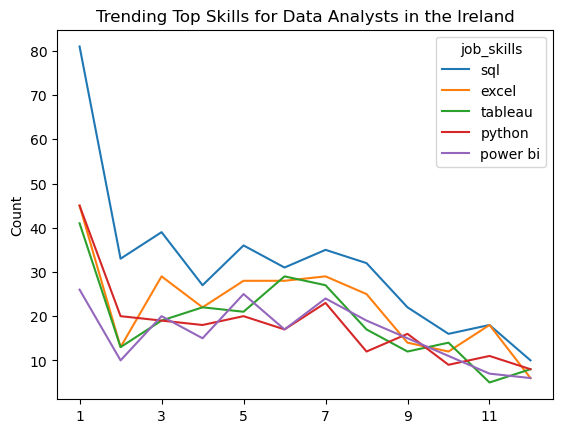

In [6]:
df_DA_IR_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Ireland')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [7]:
# Get monthly totals
DA_totals = df_DA_IR.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     151
2      68
3      73
4      60
5      57
6      54
7      65
8      60
9      37
10     31
11     34
12     19
dtype: int64

In [8]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_IR_percent = df_DA_IR_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_IR_percent = df_DA_IR_percent.reset_index()
df_DA_IR_percent['job_posted_month'] = df_DA_IR_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IR_percent = df_DA_IR_percent.set_index('job_posted_month')
df_DA_IR_percent = df_DA_IR_percent.drop(columns='job_posted_month_no')

df_DA_IR_percent

job_skills,sql,excel,tableau,python,power bi,r,sas,azure,powerpoint,sql server,...,openstack,jquery,planner,smartsheet,slack,scala,splunk,spring,unity,terminal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,53.642384,29.801325,27.152318,29.801325,17.218543,14.569536,22.516556,9.271523,5.960265,5.298013,...,0.662252,0.662252,0.662252,0.000000,0.662252,0.000000,0.000000,0.662252,0.000000,0.000000
Feb,48.529412,19.117647,19.117647,29.411765,14.705882,16.176471,8.823529,8.823529,8.823529,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.000000
Mar,53.424658,39.726027,26.027397,26.027397,27.397260,16.438356,2.739726,13.698630,15.068493,2.739726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.369863,0.000000,0.000000,0.000000
Apr,45.000000,36.666667,36.666667,30.000000,25.000000,20.000000,6.666667,13.333333,15.000000,11.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667
May,63.157895,49.122807,36.842105,35.087719,43.859649,15.789474,14.035088,8.771930,3.508772,14.035088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,57.407407,51.851852,53.703704,31.481481,31.481481,27.777778,14.814815,3.703704,7.407407,14.814815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.846154,44.615385,41.538462,35.384615,36.923077,30.769231,0.000000,10.769231,6.153846,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,53.333333,41.666667,28.333333,20.000000,31.666667,18.333333,10.000000,5.000000,8.333333,3.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,59.459459,37.837838,32.432432,43.243243,40.540541,24.324324,10.810811,27.027027,5.405405,16.216216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


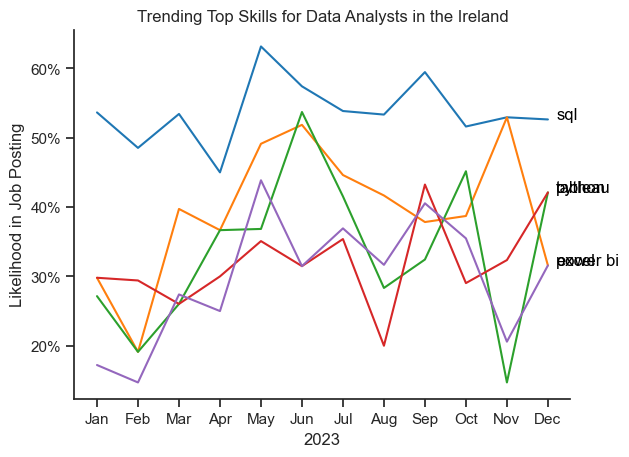

In [10]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_IR_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the Ireland')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()